# Task

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.metrics import confusion_matrix,accuracy_score,ConfusionMatrixDisplay
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
## import data set
data_df = pd.read_csv("../DataSets/Social_Network_Ads.csv")
data_df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [3]:
# check for any missing or repeated value

print(data_df.isna().sum())

print("Duplicate",data_df.duplicated().sum())

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64
Duplicate 0


In [10]:
# split the Data into Training And Testing 

df = data_df.drop(["User ID"],axis=1)
df["Gender"] = df["Gender"].replace({"Male": 0, "Female": 1})


In [11]:
## apply standard scaling on Age and Estimated salary 

scaling = StandardScaler()


numeri=["Age","EstimatedSalary"]

transform = ColumnTransformer([("numeri",scaling,numeri)])

trans_x =  transform.fit_transform(df)
trans_x

array([[-1.78179743, -1.49004624],
       [-0.25358736, -1.46068138],
       [-1.11320552, -0.78528968],
       [-1.01769239, -0.37418169],
       [-1.78179743,  0.18375059],
       [-1.01769239, -0.34481683],
       [-1.01769239,  0.41866944],
       [-0.54012675,  2.35674998],
       [-1.20871865, -1.07893824],
       [-0.25358736, -0.13926283],
       [-1.11320552,  0.30121002],
       [-1.11320552, -0.52100597],
       [-1.6862843 ,  0.47739916],
       [-0.54012675, -1.51941109],
       [-1.87731056,  0.35993973],
       [-0.82666613,  0.30121002],
       [ 0.89257019, -1.3138571 ],
       [ 0.70154394, -1.28449224],
       [ 0.79705706, -1.22576253],
       [ 0.98808332, -1.19639767],
       [ 0.70154394, -1.40195167],
       [ 0.89257019, -0.60910054],
       [ 0.98808332, -0.84401939],
       [ 0.70154394, -1.40195167],
       [ 0.79705706, -1.37258681],
       [ 0.89257019, -1.46068138],
       [ 1.08359645, -1.22576253],
       [ 0.89257019, -1.16703281],
       [-0.82666613,

In [12]:
df["Age"]=trans_x[:,0] 
df["EstimatedSalary"]=trans_x[:,1]
df

,Gender,Age,EstimatedSalary,Purchased
0,0,-1.781797,-1.490046,0
1,0,-0.253587,-1.460681,0
2,1,-1.113206,-0.785290,0
3,1,-1.017692,-0.374182,0
4,0,-1.781797,0.183751,0
...,...,...,...,...
395,1,0.797057,-0.844019,1
396,0,1.274623,-1.372587,1
397,1,1.179110,-1.460681,1
398,0,-0.158074,-1.078938,0


In [13]:
x = df.drop("Purchased",axis=1)
y = df["Purchased"]

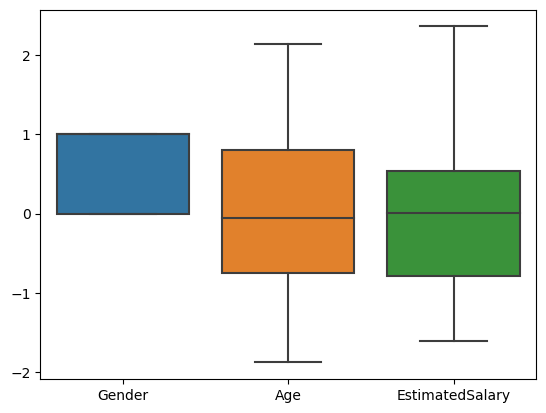

In [44]:
sns.boxplot(x);


## Model Decision Tree

In [14]:
# train_test split 
np.random.seed(42)
x_train ,x_test ,y_train ,y_test = train_test_split(x , y , test_size = 0.3 ,random_state = 42)
model = DecisionTreeClassifier()
model.fit(x_train ,y_train)

DecisionTreeClassifier()

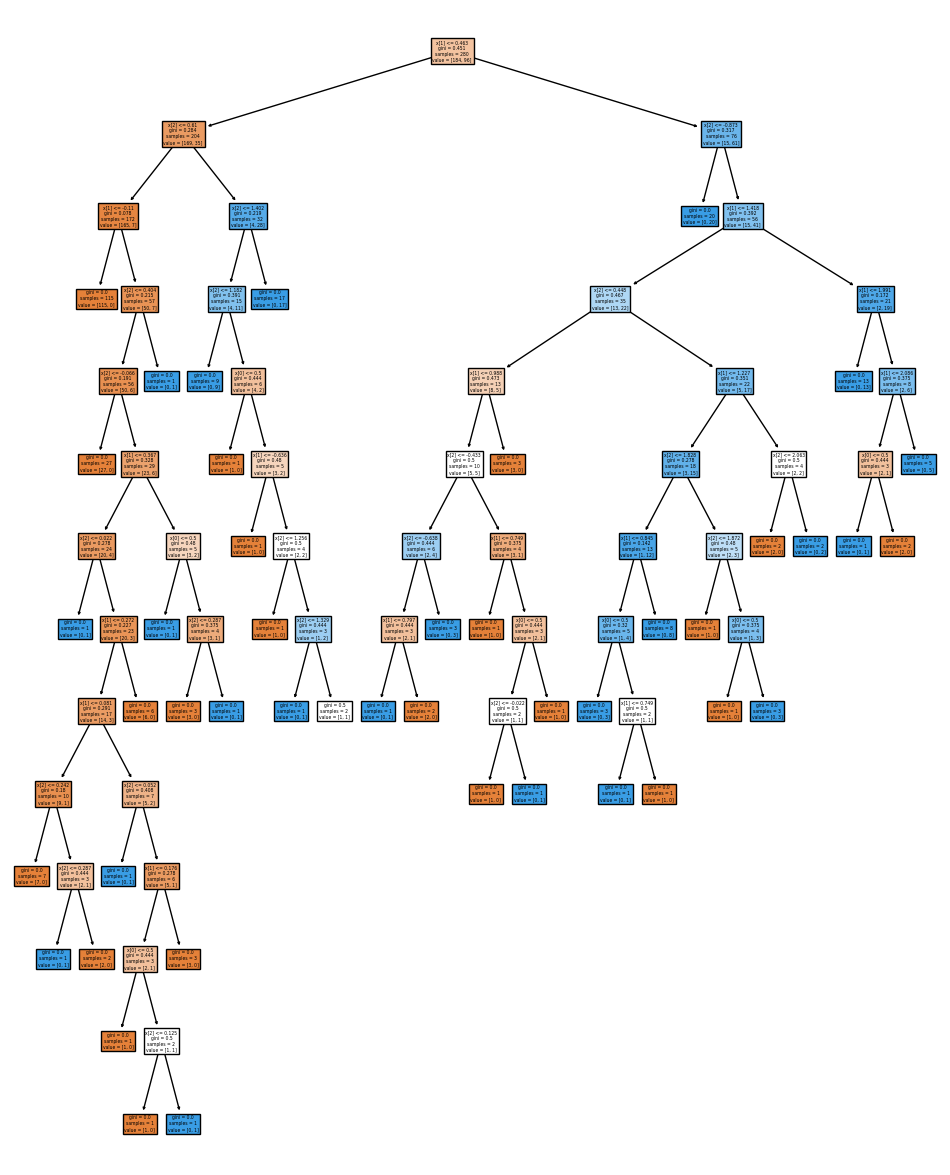

In [15]:
plt.figure(figsize=(12,15))
plot_tree(model,filled=True);


In [16]:
model.score(x_test , y_test)

0.8583333333333333

In [17]:
# predict the x_test

y_preds = model.predict(x_test)
y_preds

array([1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 0], dtype=int64)

In [19]:
## Confusion Matrix=
cm = confusion_matrix(y_test,y_preds)
cm

array([[64,  9],
       [ 8, 39]], dtype=int64)

In [21]:
df.head()

,Gender,Age,EstimatedSalary,Purchased
0,0,-1.781797,-1.490046,0
1,0,-0.253587,-1.460681,0
2,1,-1.113206,-0.785290,0
3,1,-1.017692,-0.374182,0
4,0,-1.781797,0.183751,0


In [22]:
##  user enter prediction

Gender = float(input("Gender (0 for male, 1 for female): "))
Age = float(input("Age: "))
EstimatedSalary = float(input("Estimated Salary: "))

input_test = pd.DataFrame({"Gender": [Gender],
                           "Age": [Age],
                           "EstimatedSalary": [EstimatedSalary]})


y_input_predicted = model.predict(input_test)
print("The predicted class is: ", y_input_predicted)

Gender (0 for male, 1 for female): 0
Age: -1.78179
Estimated Salary: -1.440046
   Gender      Age  EstimatedSalary
0     0.0 -1.78179        -1.440046
The predicted class is:  [0]


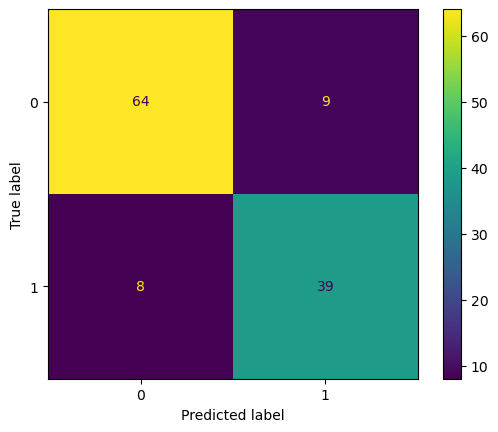

In [23]:
## ConfusionMatrixDisplay

ConfusionMatrixDisplay(cm).plot();

## RandomForestClassifier

In [24]:
np.random.seed(42)
x_train ,x_test ,y_train ,y_test = train_test_split(x , y , test_size = 0.3 ,random_state = 42)
clf = RandomForestClassifier(n_estimators=500)
clf.fit(x_train ,y_train)

RandomForestClassifier(n_estimators=500)

In [25]:
clf.score(x_test , y_test)

0.9

In [26]:
y_preds = clf.predict(x_test)
y_preds

array([1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 0], dtype=int64)

In [27]:
accuracy_score(y_test,y_preds)

0.9

In [29]:
##  user enter prediction

Gender = float(input("Gender (0 for male, 1 for female): "))
Age = float(input("Age: "))
EstimatedSalary = float(input("Estimated Salary: "))

input_test = pd.DataFrame({"Gender": [Gender],
                           "Age": [Age],
                           "EstimatedSalary": [EstimatedSalary]})


y_input_predicted = model.predict(input_test)
print("The predicted class is: ", y_input_predicted)

Gender (0 for male, 1 for female): 0
Age: 1
Estimated Salary: 1
The predicted class is:  [1]


In [28]:
## ConfusionMatrix
cm2 = confusion_matrix(y_test,y_preds)
cm2

array([[67,  6],
       [ 6, 41]], dtype=int64)

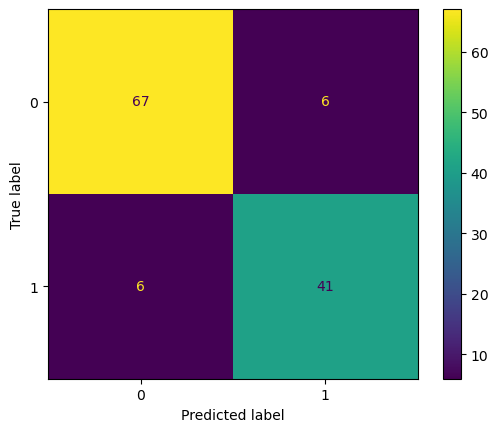

In [30]:
## ConfusionMatrixDisplay
ConfusionMatrixDisplay(cm2).plot();